# Primeiro exercício de DataScience

##### Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [3]:
# Ler dados de dataframe
df = pd.read_csv('GlobalTemperatures.csv')

In [4]:
# Ler as 5 primeiras linhas
df.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Ler as 3 ultimas linhas
df.tail(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [6]:
# Exibir somente duas colunas
df = df.ix[:,:2]
df.head(3)

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626


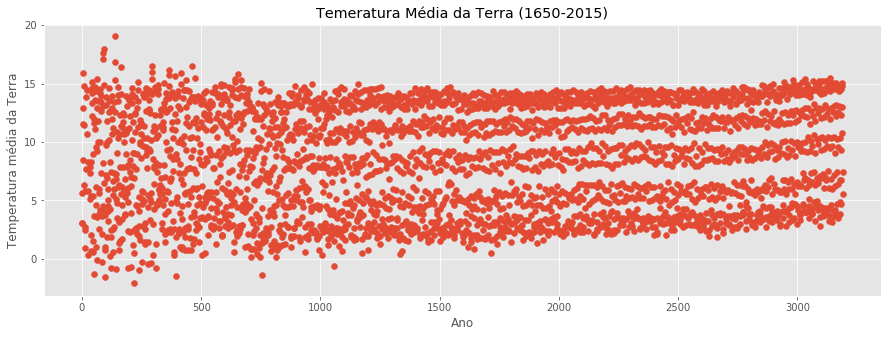

In [7]:
# Plot
plt.figure(figsize = (15,5))
plt.scatter(x = df['LandAverageTemperature'].index, y = df['LandAverageTemperature'])
plt.title("Temeratura Média da Terra (1650-2015)")
plt.xlabel("Ano")
plt.ylabel("Temperatura média da Terra")
plt.show()

In [8]:
print(type(df['dt'][0]))

<class 'str'>


In [9]:
# Converter datetime para objeto
times = pd.DatetimeIndex(df['dt'])

# Agrupar por ano
grouped = df.groupby([times.year]).mean()

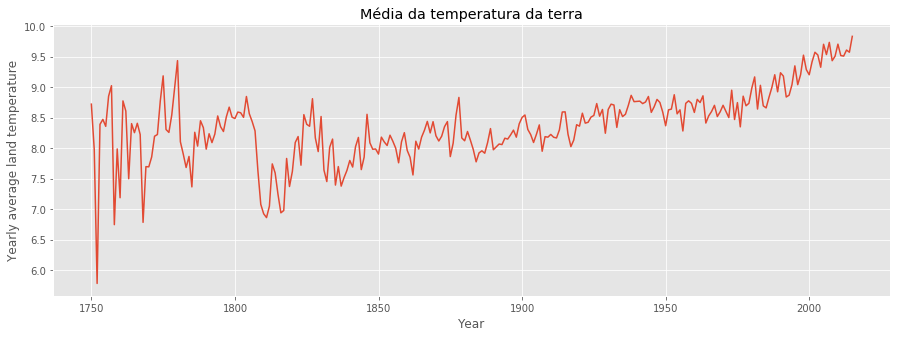

In [10]:
# Plot
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])

plt.title("Média da temperatura da terra")
plt.xlabel("Year")
plt.ylabel("Yearly average land temperature")
plt.show()

In [11]:
# Anomalias nos anos iniciais
grouped.head(5)

,LandAverageTemperature
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [12]:
# Exibir 1752
df[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [13]:
# Verificar dados sem informação no DataFrame
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [14]:
# Ajustar campos nulos com o método ffill
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(method='ffill')

In [15]:
# Verificar novamente dados sem informação no DataFrame
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature


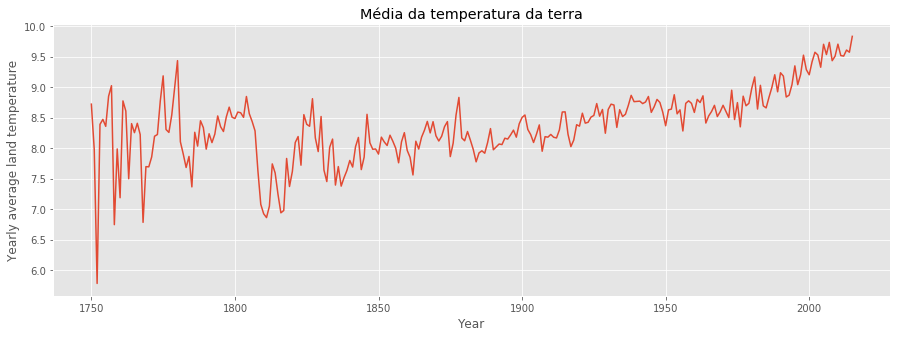

In [16]:
# Plot
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])

plt.title("Média da temperatura da terra")
plt.xlabel("Year")
plt.ylabel("Yearly average land temperature")
plt.show()

# Modelo de Dados

In [17]:
# Modelo
from sklearn.linear_model import LinearRegression as LinReg

In [18]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values

In [19]:
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Precisão: " + str(reg.score(x,y)))

Precisão: 0.387302697296


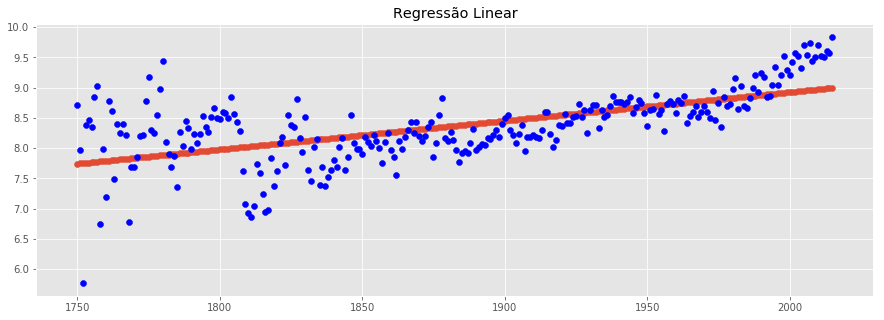

In [20]:
plt.figure(figsize = (15, 5))
plt.title("Regressão Linear")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = "b")

In [23]:
reg.predict(2099)

array([ 9.39374844])